<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/02_estadisticos_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2

### Importar las librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Crgar dataset desde mi google drive
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018_procesado.csv"
data = pd.read_csv(url)
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,...,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
0,MX-2017-SC2057582-43010,2017-10-02,2017-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,0,Mexico City,Distrito Federal,...,4.56,2.033,Medium,2017,10,2,6,10,2017,4
1,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,90.72,13.449,Medium,2015,10,15,20,10,2015,5
2,MX-2015-KW1657028-42292,2015-10-15,2015-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,0,Dos Quebradas,Risaralda,...,54.08,9.627,Medium,2015,10,15,20,10,2015,5


### Crea funciones para calcular las medidas de tendencia central y de dispersion con Python puro (sin librerias)

In [ ]:
def mean(data):
    return sum(data) / len(data)

def median(data):
    sorted_data = sorted(data)
    n = len(data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

def mode(data):
    from collections import Counter
    counts = Counter(data)
    return counts.most_common(1)[0][0]

def variance(data):
    m = mean(data)
    return sum((x - m) ** 2 for x in data) / len(data)

def std_dev(data):
    return variance(data) ** 0.5

def range(data):
    return max(data) - min(data)

### "Sales" (Ventas)

In [ ]:
# Aplicar funciones
sales_data = data['Sales'].tolist()
print("Mean:", mean(sales_data))
print("Median:", median(sales_data))
print("Mode:", mode(sales_data))
print("Variance:", variance(sales_data))
print("Standard Deviation:", std_dev(sales_data))

Mean: 246.49058120258067
Median: 85.053
Mode: 12.96
Variance: 237715.34597586998
Standard Deviation: 487.56060748984834


### Profit (Ganancia)

In [ ]:
# Aplicar funciones
Profit_data = data['Profit'].tolist()
print("Mean:", mean(Profit_data))
print("Median:", median(Profit_data))
print("Mode:", mode(Profit_data))
print("Variance:", variance(Profit_data))
print("Standard Deviation:", std_dev(Profit_data))

Mean: 28.610982477675567
Median: 9.24
Mode: 0.0
Variance: 30394.18187679922
Standard Deviation: 174.33927233070355


### Comprueba si las variables de interes "Sales" y "Profit" son conjuntos de datos parametricos o no parametricos

In [ ]:
# Test de normalidad
stat, p = stats.shapiro(data['Sales'])
alpha = 0.05
if p > alpha:
    print('Datos paramétricos (Distribución Normal)')
else:
    print('Datos no paramétricos (No Distribución Normal)')

Datos no paramétricos (No Distribución Normal)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Test de normalidad
stat, p = stats.shapiro(data['Profit'])
alpha = 0.05
if p > alpha:
    print('Datos paramétricos (Distribución Normal)')
else:
    print('Datos no paramétricos (No Distribución Normal)')

Datos no paramétricos (No Distribución Normal)


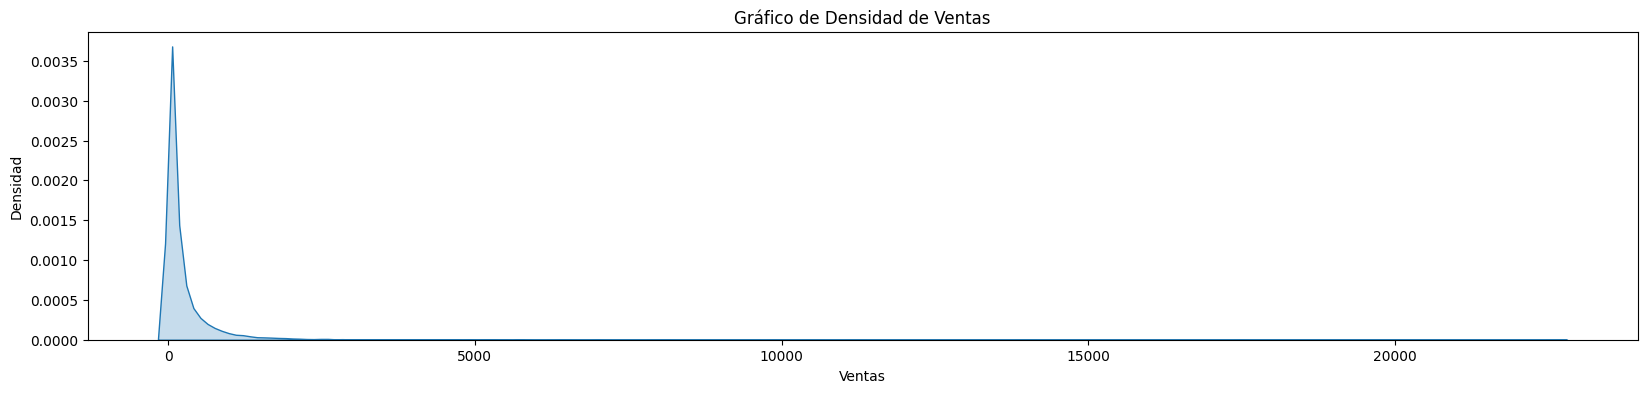

In [ ]:
# Crear el gráfico de densidad
plt.figure(figsize=(20,4))
sns.kdeplot(data['Sales'], fill=True)
plt.title('Gráfico de Densidad de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Densidad')
plt.show()

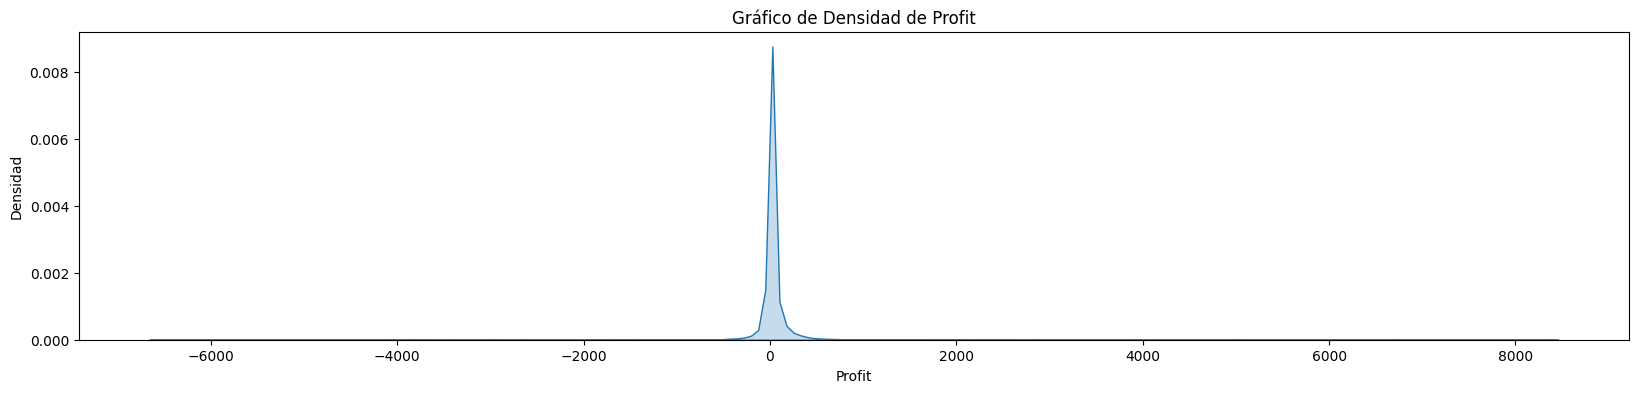

In [ ]:
# Crear el gráfico de densidad
plt.figure(figsize=(20,4))
sns.kdeplot(data['Profit'], fill=True)
plt.title('Gráfico de Densidad de Profit')
plt.xlabel('Profit')
plt.ylabel('Densidad')
plt.show()

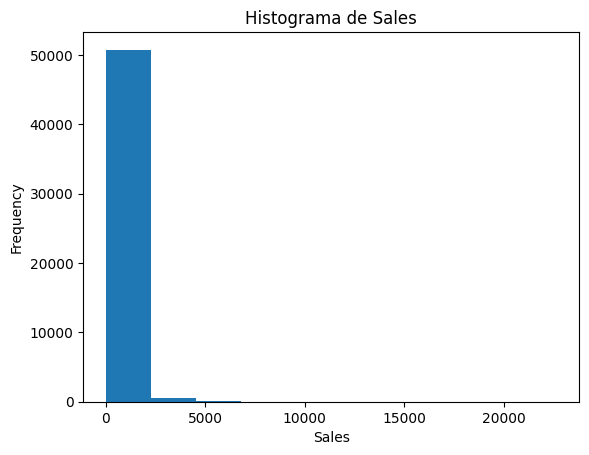

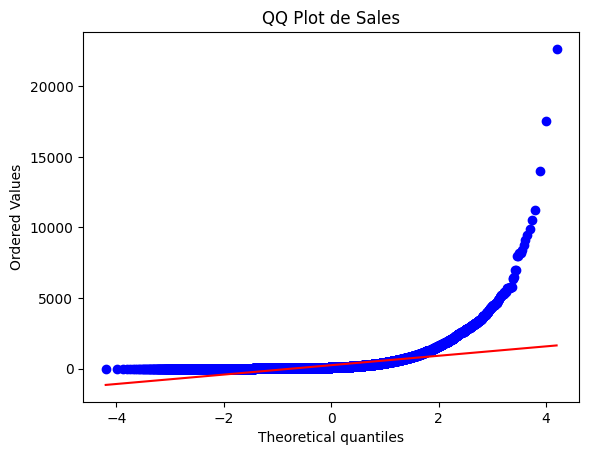

In [ ]:
# Hostograma de "Sales"
plt.hist(data["Sales"], bins=10)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histograma de Sales")
plt.show()

# QQ plot de "Sales"
stats.probplot(data["Sales"], dist="norm", plot=plt)
plt.title("QQ Plot de Sales")
plt.show()

Basado en el histograma y el gráfico QQ es posible determina la distribución. Si el histograma tiene forma de campana y los puntos en el gráfico QQ se encuentran cerca de la línea recta, entonces los datos probablemente tienen una distribución normal. Si el histograma está sesgado o los puntos en el gráfico QQ se desvían de la línea recta, entonces los datos probablemente no tienen una distribución normal.

En este caso, el histograma está sesgado y los puntos en el gráfico QQ se desvían de la línea recta, por lo que es probable que la columna “Ventas” no tenga una distribución normal.

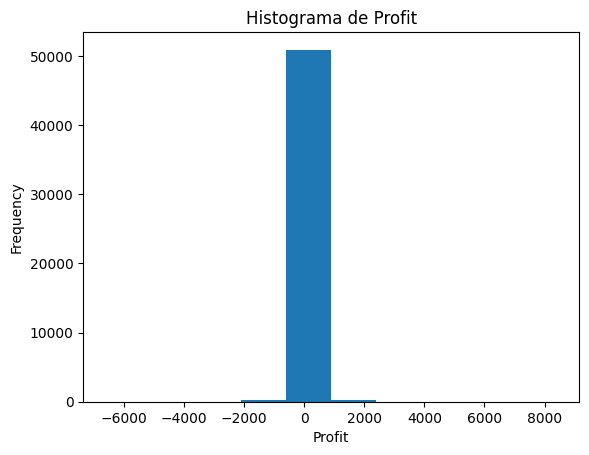

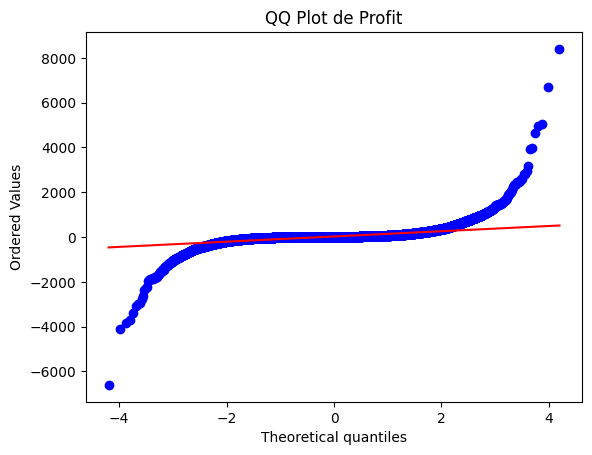

In [ ]:
# Histograma de "Profit"
plt.hist(data["Profit"], bins=10)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Histograma de Profit")
plt.show()

# QQ plot de "Profit"
stats.probplot(data["Profit"], dist="norm", plot=plt)
plt.title("QQ Plot de Profit")
plt.show()

### Calcula estadisticos descriptivos basicos para tus datos

In [ ]:
# Usando pandas para comparar
desc_stats = data['Sales'].describe()
print(desc_stats)

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64


In [ ]:
# Usando pandas para comparar
desc_stats2 = data['Profit'].describe()
print(desc_stats2)

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64


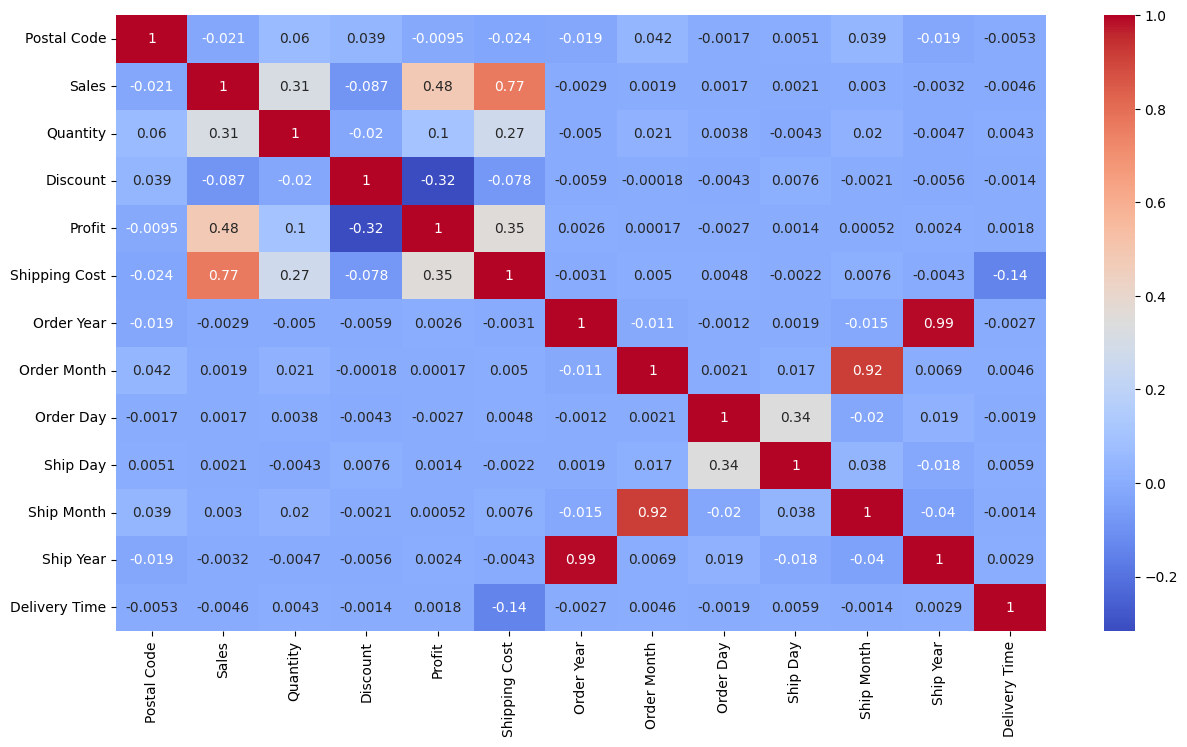

In [ ]:
# Genera una matriz de correlación del dataset únicamente con las columnas numéricas del dataset, y genera un mapa de calor

# Seleccionar columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlación
correlation_matrix = data[numeric_cols].corr()

# Crear figura con tamaño personalizado
plt.figure(figsize=(15, 8))

# Generar mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
correlation_matrix

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Year,Order Month,Order Day,Ship Day,Ship Month,Ship Year,Delivery Time
Postal Code,1.000000,-0.021402,0.059716,0.039499,-0.009549,-0.024056,-0.019282,0.042415,-0.001732,0.005076,0.038704,-0.018527,-0.005256
Sales,-0.021402,1.000000,0.313577,-0.086722,0.484918,0.767835,-0.002905,0.001851,0.001661,0.002104,0.002951,-0.003196,-0.004570
Quantity,0.059716,0.313577,1.000000,-0.019875,0.104365,0.271804,-0.005049,0.020646,0.003839,-0.004338,0.019996,-0.004721,0.004304
Discount,0.039499,-0.086722,-0.019875,1.000000,-0.316490,-0.078153,-0.005894,-0.000180,-0.004273,0.007562,-0.002139,-0.005624,-0.001443
Profit,-0.009549,0.484918,0.104365,-0.316490,1.000000,0.354423,0.002626,0.000173,-0.002726,0.001406,0.000523,0.002438,0.001816
Shipping Cost,-0.024056,0.767835,0.271804,-0.078153,0.354423,1.000000,-0.003135,0.004956,0.004829,-0.002240,0.007649,-0.004262,-0.142416
Order Year,-0.019282,-0.002905,-0.005049,-0.005894,0.002626,-0.003135,1.000000,-0.011016,-0.001174,0.001855,-0.014721,0.994121,-0.002689
Order Month,0.042415,0.001851,0.020646,-0.000180,0.000173,0.004956,-0.011016,1.000000,0.002073,0.016590,0.915146,0.006942,0.004624
Order Day,-0.001732,0.001661,0.003839,-0.004273,-0.002726,0.004829,-0.001174,0.002073,1.000000,0.344369,-0.020287,0.018525,-0.001887
Ship Day,0.005076,0.002104,-0.004338,0.007562,0.001406,-0.002240,0.001855,0.016590,0.344369,1.000000,0.038209,-0.017982,0.005890


In [ ]:
# prompt: Con DataFrame correlation_matrix: create a table with the highest absolute values of correlation matrix avoiding the correlation with value 1

abs_correlation_matrix = correlation_matrix.abs()
highest_correlations = abs_correlation_matrix.unstack().sort_values(ascending=False)
highest_correlations_without_self = highest_correlations[highest_correlations != 1.0]
highest_correlations_table = highest_correlations_without_self.to_frame().reset_index()
highest_correlations_table.columns = ['Variable 1', 'Variable 2', 'Correlation']
highest_correlations_table
highest_correlations_table['Correlation'].abs() >= 0.5

,Variable 1,Variable 2,Correlation
0,Ship Year,Order Year,0.996040
1,Order Year,Ship Year,0.996040
2,Ship Month,Order Month,0.943453
3,Order Month,Ship Month,0.943453
4,Sales,Shipping Cost,0.644891
...,...,...,...
177,Ship Year,Profit,0.001275
178,Order Month,Delivery Time,0.001004
179,Delivery Time,Order Month,0.001004
180,Discount,Ship Day,0.000508


from matplotlib import pyplot as plt
highest_correlations_table['Correlation'].plot(kind='hist', bins=20, title='Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
highest_correlations_table['Correlation'].plot(kind='line', figsize=(8, 4), title='Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
highest_correlations_table[highest_correlations_table['Correlation'] >= 0.5]

,Variable 1,Variable 2,Correlation
0,Ship Year,Order Year,0.996040
1,Order Year,Ship Year,0.996040
2,Ship Month,Order Month,0.943453
3,Order Month,Ship Month,0.943453
4,Sales,Shipping Cost,0.644891
5,Shipping Cost,Sales,0.644891
6,Postal Code,Shipping Cost,0.565131
7,Shipping Cost,Postal Code,0.565131
8,Quantity,Sales,0.555691
9,Sales,Quantity,0.555691


Ship Year y Order Year (0.996040): Esta correlación casi perfecta sugiere que el año en que se realizó el pedido y el año en que se envió el producto están altamente relacionados. Es lógico, ya que los pedidos generalmente se envían en el mismo año en que se realizaron.

Ship Month y Order Month (0.943453): Similar al caso anterior, la correlación alta entre los meses de envío y los meses de pedido indica que los productos se envían generalmente en el mismo mes en que se realizaron los pedidos.

Sales y Shipping Cost (0.644891): Existe una correlación positiva moderada entre las ventas y los costos de envío. Esto podría deberse a que los productos más caros tienden a generar mayores ingresos y, por lo tanto, también tienen costos de envío más altos.

Profit y Discount (0.505190): Aquí vemos una correlación positiva entre el beneficio y los descuentos aplicados. Es posible que los productos con mayores descuentos tengan un impacto en el margen de beneficio.

In [ ]:
# Prueba de hipótesis para correlación entre ventas y descuento
alpha = 0.05
hipotesis1 = data[['Sales', 'Discount']]

corr, _ = pearsonr(data['Sales'], data['Discount'])
print('Pearson correlation:', corr)

# Prueba de hipótesis
if corr > alpha:
    print('Rechazar H0: Existe correlación significativa entre ventas y descuento')
else:
    print('No rechazar H0: No existe correlación significativa entre ventas y descuento')

Pearson correlation: -0.08672186697182654
No rechazar H0: No existe correlación significativa entre ventar y descuento


In [ ]:
# Prueba de hipótesis para correlación entre ventas y descuento
alpha = 0.05
hipotesis2 = data[['Sales', 'Profit']]

corr, _ = pearsonr(data['Sales'], data['Profit'])
print('Pearson correlation:', corr)

# Prueba de hipótesis
if corr > alpha:
    print('Rechazar H0: Existe correlación significativa entre Sales y Profit')
else:
    print('No rechazar H0: No existe correlación significativa')

Pearson correlation: 0.4849181126194446
Rechazar H0: Existe correlación significativa entre Sales y Profit


In [ ]:
# Prueba de hipótesis para correlación entre ventas y descuento
alpha = 0.05
hipotesis2 = data[['Shipping Cost', 'Sales']]

corr, _ = pearsonr(data['Shipping Cost'], data['Sales'])
print('Pearson correlation:', corr)

# Prueba de hipótesis
if corr > alpha:
    print('Rechazar H0: Existe correlación significativa entre Shipping Cost y Sales')
else:
    print('No rechazar H0: No existe correlación significativa')

Pearson correlation: 0.7678347682798696
Rechazar H0: Existe correlación significativa entre Shipping Cost y Sales


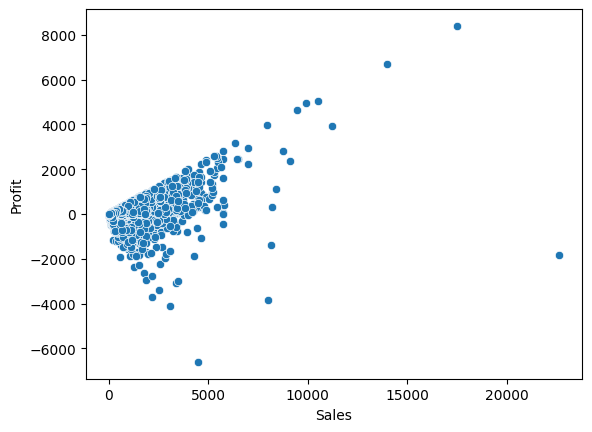

In [ ]:
# Gráfico de dispersión
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.show()

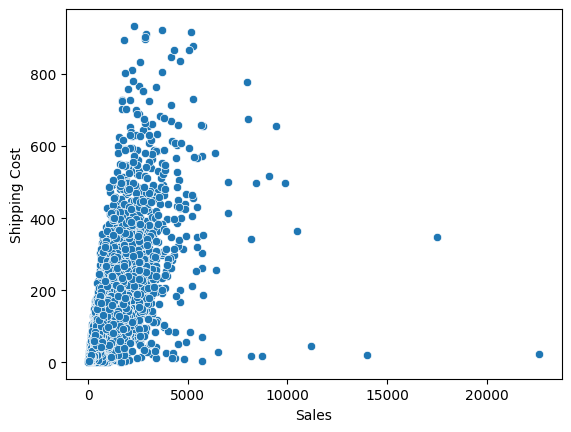

In [ ]:
# Gráfico de dispersión
sns.scatterplot(x='Sales', y='Shipping Cost', data=data)
plt.show()

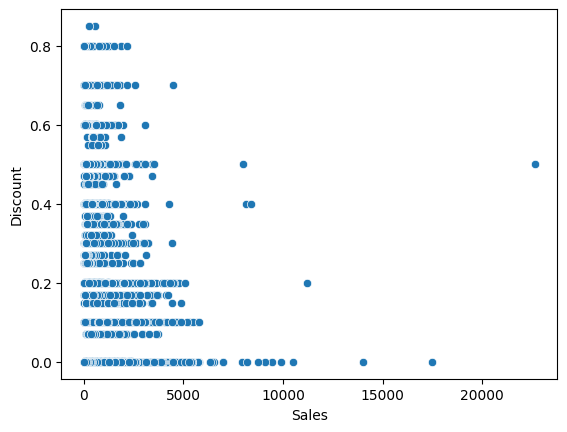

In [ ]:
# Gráfico de dispersión
sns.scatterplot(x='Sales', y='Discount', data=data)
plt.show()